In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns                             
import matplotlib.pyplot as plt   
import scipy.sparse as sp
import os

from spektral.data import Dataset, Loader, Graph, SingleLoader, DisjointLoader
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras.layers import Dense
import keras.metrics
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf


2023-03-08 12:20:11.012223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def load(mypath):
    c = pd.read_csv(mypath)
    c=c.rename(columns={"Unnamed: 0": "number"})
    c.drop(columns=['number'],inplace=True)
    #print(c)
    return c

In [3]:
c2=load('/Users/mariaussano/Desktop/scaled_cluster2.txt')
c4=load(('/Users/mariaussano/Desktop/scaled_cluster4.txt'))

In [4]:
c2

,city,TOT_mean,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,...,"('d_from_', 'Rochester, Minnesota')","('d_from_', 'Vernal, Utah')","('d_from_', 'Bend, Oregon')","('d_from_', 'Flagstaff, Arizona')","('d_from_', 'Montrose, Colorado')","('d_from_', 'Clovis, California')","('d_from_', 'Santa Rosa, California')","('d_from_', 'Spearfish, South Dakota')","('d_from_', 'Marietta, Georgia')","('d_from_', 'Belgrade, Montana')"
0,"Fort Worth, Texas",-0.165631,-0.148714,-0.008793,1.583277,-0.351125,0.487157,1.544886,1.068921,-0.381515,...,1.999056,2.160587,2.236987,2.568616,2.639444,2.717338,2.919790,3.117179,3.150085,3.983262
1,Louisville/Jefferson County metro government (...,-0.228196,0.160199,-0.629881,1.161723,-0.218416,0.371602,0.206409,0.760416,-0.885700,...,1.486713,1.648244,1.724644,2.056273,2.127101,2.204995,2.407447,2.604836,2.637742,3.470919
2,"Phoenix, Arizona",1.286664,1.500587,1.650245,1.491922,1.321002,0.442537,-0.666485,0.471193,-0.219456,...,0.997660,1.159190,1.235590,1.567220,1.638047,1.715941,1.918393,2.115782,2.148688,2.981865
3,"Charlotte, North Carolina",-0.314859,0.088878,0.944596,0.045956,1.086551,1.444059,0.894501,-0.010846,0.176690,...,0.851630,1.013160,1.089561,1.421190,1.492018,1.569912,1.772363,1.969753,2.002659,2.835836
4,"Memphis, Tennessee",-0.023420,-0.103242,0.477276,-0.144607,-0.169756,-1.515459,-0.238709,0.413348,-0.849687,...,0.668485,0.830016,0.906416,1.238045,1.308873,1.386767,1.589218,1.786608,1.819514,2.652691
5,"Austin, Texas",-0.065523,0.178101,0.581356,0.022312,2.236691,1.547744,1.307759,-0.907438,1.725259,...,0.314885,0.476416,0.552816,0.884445,0.955273,1.033167,1.235619,1.433008,1.465914,2.299091
6,"Tucson, Arizona",-0.180550,-0.374074,-0.483790,-1.153146,-0.594423,-0.833285,-1.599467,-0.280788,0.140677,...,0.000000,0.161530,0.237931,0.569560,0.640388,0.718281,0.920733,1.118122,1.151028,1.984205
7,"Kansas City, Missouri",-0.654611,-0.817708,-0.785886,-0.294412,-0.311312,0.380469,0.535886,0.644727,0.050644,...,0.161530,0.000000,0.076401,0.408030,0.478858,0.556751,0.759203,0.956592,0.989498,1.822675
8,"Dallas, Texas",0.587553,0.931239,2.640475,1.837665,1.896072,-1.145912,1.544886,-1.196661,1.923332,...,0.237931,0.076401,0.000000,0.331629,0.402457,0.480351,0.682802,0.880192,0.913098,1.746275
9,"Wichita, Kansas",-0.759692,-0.841498,-0.932980,0.430307,-0.722708,0.684801,-0.176806,1.174969,-0.831681,...,0.569560,0.408030,0.331629,0.000000,0.070828,0.148721,0.351173,0.548562,0.581468,1.414645


In [5]:
c4

,city,TOT_mean,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,...,"('d_from_', 'Portland, Maine')","('d_from_', 'Watertown, New York')","('d_from_', 'Des Moines, Iowa')","('d_from_', 'Tacoma, Washington')","('d_from_', 'La Crosse, Wisconsin')","('d_from_', 'Philadelphia, Pennsylvania')","('d_from_', 'Bangor, Maine')","('d_from_', 'Omaha, Nebraska')","('d_from_', 'San Francisco, California')","('d_from_', 'Grand Forks, North Dakota')"
0,"Boston, Massachusetts",0.264430,0.795511,1.496522,-0.348658,0.973572,0.164685,1.216763,-1.768195,1.406956,...,2.044361,2.100952,2.137851,2.295671,2.442569,2.831406,2.866480,4.128395,4.138900,4.171846
1,"Rochester, New York",-0.113194,0.222612,-0.554986,1.165513,-0.432376,-1.891881,-0.745825,0.255713,-0.604923,...,1.196119,1.252709,1.289608,1.447429,1.594327,1.983163,2.018238,3.280153,3.290658,3.323604
2,"Milwaukee, Wisconsin",0.222025,0.495016,1.018258,1.605725,-0.153048,-1.387606,-0.186342,-0.055657,-0.296797,...,1.145285,1.201875,1.238775,1.396595,1.543493,1.932330,1.967404,3.229319,3.239824,3.272770
3,"Manchester, New Hampshire",-0.875688,-0.659578,0.362959,-0.569877,-0.373406,0.668868,0.030462,-0.236252,0.011328,...,1.096371,1.152961,1.189860,1.347681,1.494579,1.883415,1.918489,3.180405,3.190910,3.223856
4,"Salt Lake City, Utah",0.479794,-0.376712,0.592136,1.795676,0.132487,-0.022110,0.069734,0.442535,0.881330,...,0.927005,0.983595,1.020494,1.178315,1.325213,1.714050,1.749124,3.011039,3.021544,3.054490
5,"Long Beach, California",0.061147,-0.148216,-0.254608,-0.217410,-0.382717,0.085838,0.427507,-0.018293,0.138203,...,0.507637,0.564227,0.601126,0.758947,0.905845,1.294681,1.329756,2.591671,2.602176,2.635122
6,"Portland, Maine",-0.745319,-0.658986,-0.870781,-0.909737,-0.336163,0.586565,-0.620095,-0.248707,-0.405548,...,0.000000,0.056590,0.093489,0.251310,0.398208,0.787044,0.822119,2.084034,2.094539,2.127485
7,"Watertown, New York",-1.120492,-0.874575,-1.113748,-1.108339,-0.727221,-0.915890,-1.012012,0.087573,-1.039924,...,0.056590,0.000000,0.036899,0.194720,0.341618,0.730454,0.765528,2.027444,2.037949,2.070895
8,"Des Moines, Iowa",-0.154956,-0.163754,-0.586519,-0.454200,-0.401339,-0.204540,1.088175,1.507423,-0.188047,...,0.093489,0.036899,0.000000,0.157821,0.304718,0.693555,0.728629,1.990545,2.001050,2.033996
9,"Tacoma, Washington",-0.023405,-0.397697,-0.847848,-0.425034,-0.615490,0.189239,1.314870,1.339283,-0.568673,...,0.251310,0.194720,0.157821,0.000000,0.146898,0.535734,0.570809,1.832724,1.843229,1.876175


In [6]:
def build_graph(c):
    labels = []
    nodes = []
    X = []
    for i,data in enumerate(c.index): 
        labels.append(c.loc[i,'TOT_mean'])
        X.append(c.iloc[i,2:])
        nodes.append(c.loc[i,'city'])

    X = np.array(X,dtype=float)  
    N = X.shape[0] #the number of nodes 
    F = X.shape[1] #the size of node features #1
    print('X shape: ', X.shape)        

    print('\nNumber of nodes (N): ', N)
    print('\nNumber of features (F) of each node: ', F)
    #print('\nsorted targets: ', sorted(set(labels)))
    print('labels:', labels)

    num_classes = len(set(labels))
    print('\nNumber of classes: ', num_classes)
    
    V=[]
    a = np.zeros((N, N))
    for i in range(N):
        for j in range(1,N+1):
            #print('self.cluster.loc[',i,',',j,']',self.cluster.iloc[i,j])
            if(c.iloc[i,j]<=2):
                a[i,j-1]=1
                V.append(c.iloc[i,j])
            #print ('a[',i,',',j-2,']:', a[i,j-2] )     
        #print('a:', a)           
    a = np.maximum(a, a.T).astype(int) #.T do the transpose
    a = sp.csr_matrix(a)                   
    print('Shape of A: ', a.shape)
    print('\nAdjacency Matrix (a):\n', a)
    # Preprocessing operations
    a = GCNConv.preprocess(a).astype('f4')
    print('X:',X)
    
    #r,v= a.nonzero()
    #e = sp.csr_matrix((V,(r,v))) 
    #ee=e.toarray()
    
    return labels,nodes,X,N,F,a


In [7]:
targets2,nodes2,x2,n2,f2,a2=build_graph(c2)


X shape:  (16, 34)

Number of nodes (N):  16

Number of features (F) of each node:  34
labels: [-0.1656311673202647, -0.2281957811227475, 1.2866635452399902, -0.3148588629083396, -0.023419867114868, -0.0655231480934081, -0.1805503599413035, -0.6546105245838832, 0.5875526102590108, -0.7596920778723519, 0.0811401931011167, -0.9287432655190312, -0.6577243253464531, -0.3150488778099439, -0.9093710254455416, 3.248012934478018]

Number of classes:  16
Shape of A:  (16, 16)

Adjacency Matrix (a):
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  :	:
  (14, 6)	1
  (14, 7)	1
  (14, 8)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (14, 12)	1
  (14, 13)	1
  (14, 14)	1
  (14, 15)	1
  (15, 1)	1
  (15, 2)	1
  (15, 3)	1
  (15, 4)	1
  (15, 5)	1
  (15, 6)	1
  (15, 7)	1
  (15, 8

In [8]:
targets4,nodes4,x4,n4,f4,a4=build_graph(c4)

X shape:  (16, 34)

Number of nodes (N):  16

Number of features (F) of each node:  34
labels: [0.2644297840685283, -0.1131941650064338, 0.2220246864052988, -0.8756880962435769, 0.4797944079872109, 0.0611467202141334, -0.745318909607009, -1.120491711783869, -0.1549562668993513, -0.0234054809798646, -0.967950728929834, 2.260045325646394, -1.109889920872829, 0.8326701739128662, 2.0071594618698563, -1.016375279781519]

Number of classes:  16
Shape of A:  (16, 16)

Adjacency Matrix (a):
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (1, 8)	1
  :	:
  (14, 7)	1
  (14, 8)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (14, 12)	1
  (14, 13)	1
  (14, 14)	1
  (14, 15)	1
  (15, 0)	1
  (15, 1)	1
  (15, 2)	1
  (15, 3)	1
  (15, 4)	1
  (15, 5)	1
  (15, 6)	1
  (15, 7)	1
  (15, 8)	1
  

In [9]:
yy2=np.zeros(shape=(16,16))
for i,data in enumerate(targets2):
    #print((i,data))
    yy2[i,i]=data
    #print(l[i,i])
print(yy2)

[[-0.16563117  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.22819578  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          1.28666355  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.31485886  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.02341987  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.06552315
   0.      

In [10]:
yy4=np.zeros(shape=(16,))
for i,data in enumerate(targets4):
    #print((i,data))
    yy4[i]=data
    #print(l[i,i])
print(yy4)


[ 0.26442978 -0.11319417  0.22202469 -0.8756881   0.47979441  0.06114672
 -0.74531891 -1.12049171 -0.15495627 -0.02340548 -0.96795073  2.26004533
 -1.10988992  0.83267017  2.00715946 -1.01637528]


In [11]:
#targets1,nodes1,x1,n1,f1,a1,e1=build_graph(c4)

In [12]:
'''from sklearn import preprocessing
from keras.utils import to_categorical
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    #print('label_encoder',label_encoder)
    labels = label_encoder.fit_transform(labels)
    #print('labels',label)
    labels = to_categorical(labels)
    print('labels',labels)
    print('labels.shape',labels.shape)
    return labels, label_encoder.classes_'''

"from sklearn import preprocessing\nfrom keras.utils import to_categorical\ndef encode_label(labels):\n    label_encoder = preprocessing.LabelEncoder()\n    #print('label_encoder',label_encoder)\n    labels = label_encoder.fit_transform(labels)\n    #print('labels',label)\n    labels = to_categorical(labels)\n    print('labels',labels)\n    print('labels.shape',labels.shape)\n    return labels, label_encoder.classes_"

In [13]:
'''encoder = preprocessing.LabelEncoder()
labels = encoder.fit_transform(targets)
#print(labels)
#print(encoder.inverse_transform(labels))
print('targets',targets)
labels_encoded=to_categorical(labels)
print('labels',labels_encoded)
#print('labels.shape',labels_encoded.shape)'''


"encoder = preprocessing.LabelEncoder()\nlabels = encoder.fit_transform(targets)\n#print(labels)\n#print(encoder.inverse_transform(labels))\nprint('targets',targets)\nlabels_encoded=to_categorical(labels)\nprint('labels',labels_encoded)\n#print('labels.shape',labels_encoded.shape)"

In [14]:
#labels_encoded1, classes1 = encode_label(targets1)

In [15]:
#build the graph with spektral.data
G2 = Graph(x=x2,a=a2,y=yy2)
G4 = Graph(x=x4,a=a4,y=yy4)
#G4 = Graph(x=x1,a=a1,e=e1,y=labels_encoded1)

In [16]:
print('Graph2 info: ', nx.info(G2))
print('Graph4 info: ', nx.info(G4))

Graph2 info:  Graph(n_nodes=16, n_node_features=34, n_edge_features=None, n_labels=16)
Graph4 info:  Graph(n_nodes=16, n_node_features=34, n_edge_features=None, n_labels=16)


/var/folders/rj/j2rdzd094m342tyh8mxvz6vc0000gn/T/ipykernel_3124/789246816.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('Graph2 info: ', nx.info(G2))
/var/folders/rj/j2rdzd094m342tyh8mxvz6vc0000gn/T/ipykernel_3124/789246816.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('Graph4 info: ', nx.info(G4))


In [17]:
class CustomModel(keras.Model):
    def test_step(self, data):
        # Unpack the data
        x, y = data
        # Compute predictions
        y_pred = self(x, training=False)
        # Updates the metrics tracking the loss
        self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        # Update the metrics.
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics} 

In [18]:
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100           # Number of training epochs
es_patience = 10       # Patience for early stopping

# Model definition
X_in = Input(shape=(f2, ))
fltr_in = Input((n2, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])
dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(16,
                         activation='linear',kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_2, fltr_in])
#dropout_3 = Dropout(dropout)(graph_conv_2)
#dense = Dense(16,activation='linear',use_bias=False)(dropout_3)

# Build model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2, name='GCNN3')
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae',tf.keras.metrics.RootMeanSquaredError()],
              weighted_metrics=[])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora')
callback_GCN = [tbCallBack_GCN]

2023-03-08 12:20:22.757153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "GCNN3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 dropout (Dropout)              (None, 34)           0           ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 gcn_conv (GCNConv)             (None, 16)           544         ['dropout[0][0]',                
                                                                  'input_2[0][0]']            

In [19]:
#model.save_weights("untrained_weights.h5")

def limit_data(labels,limit=1,val_num=2,test_num=2):
    '''
    Get the index of train, validation, and test data
    '''
    label_counter = dict((l, 0) for l in labels)
    print('label_counter:',label_counter) 
    train_idx = []

    for i in range(len(labels)):
        label = labels[i]
        if label_counter[label]<limit:
            #add the example to the training data
            train_idx.append(i)
            label_counter[label]+=1
        
        #exit the loop once we found 20 examples for each class
        if all(count == limit for count in label_counter.values()):
            break
    
    #get the indices that do not go to traning data
    rest_idx = [x for x in range(len(labels)) if x not in train_idx]
    val_idx = rest_idx[:val_num]
    test_idx = rest_idx[val_num:(val_num+test_num)]
    return train_idx, val_idx,test_idx


train_idx,val_idx,test_idx = limit_data(targets)

print('train_idx')
print(train_idx)

print('val_idx')
print(val_idx)

print('test_idx')
print(test_idx)

#set the mask
train_mask = np.zeros((n,),dtype=bool)
train_mask[train_idx] = True

print('train_mask')
print(train_mask)

val_mask = np.zeros((n,),dtype=bool)
val_mask[val_idx] = True
print('val_mask')
print(val_mask)


test_mask = np.zeros((n,),dtype=bool)
test_mask[test_idx] = True
print('test_mask')
print(test_mask)

In [20]:
# Utility function to create folders and callbacks for training
# parameters-> monitor, mode
from datetime import datetime

def create_folders_and_callbacks(model_name,now):
    exps_dir = os.path.join('Model_Training_24/02')
    if not os.path.exists(exps_dir):
        os.makedirs(exps_dir)


    exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
    if not os.path.exists(exp_dir):
        os.makedirs(exp_dir)
      
    callbacks = []

    # Model checkpoint
    # ----------------
    ckpt_dir = os.path.join(exp_dir, 'ckpts')
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), verbose=1,
                                                     save_weights_only=True, # True to save only weights
                                                     save_best_only=True
                                                    ) # True to save only the best epoch 
    callbacks.append(ckpt_callback)

    # Visualize Learning on Tensorboard
    # ---------------------------------
    tb_dir = os.path.join(exp_dir, 'tb_logs')
    if not os.path.exists(tb_dir):
        os.makedirs(tb_dir)
      
    # By default shows losses and metrics for both training and validation
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
    callbacks.append(tb_callback)

    # Early Stopping
    # --------------
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=es_patience, restore_best_weights=True)
    reducelr_callback=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=7, factor=0.5, min_lr=1e-5)
    callbacks.append(es_callback)
    callbacks.append(reducelr_callback)
   

    return callbacks

In [21]:
now = datetime.now().strftime('%b%d_%H-%M-%S')
handmade_callbacks = create_folders_and_callbacks(model_name='model1',now=now)

In [31]:
#LOO funzionante
from sklearn.model_selection import LeaveOneOut
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
'''x_train, a_train, x_test, a_test = train_test_split([x,a], train_size=0.8, shuffle=True, random_state=1)
target_train,target_test=train_test_split(labels_encoded, train_size=0.8, shuffle=True, random_state=1)
print('x_train:',x_train)
print('a_train:',a_train)
print('x_test:',x_test)
print('a_test:',a_test)'''
loo=LeaveOneOut()
loo.get_n_splits(c2)
#print('np.random.randint(0,10):',np.random.randint(0,10,size=10))
predictions=[]
for idx_tr, idx_va in loo.split(c2):
    print("idx_tr:", idx_tr)
    print("idx_va:", idx_va)
    #set the mask
    train_mask = np.zeros((n2,),dtype=bool)
    train_mask[idx_tr] = True
    print('train_mask:',train_mask)
    val_mask = np.zeros((n2,),dtype=bool)
    val_mask[idx_va] = True
    print('val_mask:',val_mask)
    # Train model
    validation_data = ([x2,a2],yy2,val_mask)
    #print('validation_data',validation_data)'''
    history=model.fit(x=[x2, a2], y=yy2,
                      epochs=epochs,
                      batch_size=n2,
                      validation_data=validation_data,
                      shuffle=False,
                      callbacks=[handmade_callbacks]).history 
    

#report = classification_report(np.argmax(labels_encoded,axis=1), np.argmax(predictions,axis=1))
    
    
#print('predictions',predictions)

idx_tr: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
idx_va: [0]
train_mask: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
val_mask: [ True False False False False False False False False False False False
 False False False False]
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0714 - mae: 0.0796 - root_mean_squared_error: 0.2424
Epoch 1: val_loss improved from 0.01288 to 0.01286, saving model to Model_Training_24/02/model1_Mar08_12-20-24/ckpts/cp.ckpt
1/1 [==============================] - 0s 156ms/step - loss: 0.0714 - mae: 0.0796 - root_mean_squared_error: 0.2424 - val_loss: 0.0129 - val_mae: 0.0717 - val_root_mean_squared_error: 0.2427 - lr: 1.0000e-05
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0707 - mae: 0.0720 - root_mean_squared_error: 0.2411
Epoch 2: val_loss improved from 0.01286 to 0.01286, saving model to Model_Training_24/02/model1_Mar08_12-20-24/ckpts/cp.ckpt
1/1 [======

In [32]:
y_pred2 = model.predict([x2, a2],batch_size=n2)
print('y_pred =',y_pred2)

1/1 [==============================] - 0s 29ms/step
y_pred = [[-0.00466357 -0.01234648  0.06865349 -0.0194058   0.00345619  0.00394421
  -0.01024378 -0.03926101  0.03342415 -0.03576304 -0.00340806 -0.05355725
  -0.0452601  -0.01604426 -0.05253958  0.15548562]
 [-0.00482992 -0.01278687  0.07110229 -0.02009799  0.00357947  0.0040849
  -0.01060916 -0.04066142  0.03461635 -0.03703867 -0.00352962 -0.05546759
  -0.04687447 -0.01661654 -0.05441361  0.16103162]
 [-0.00482662 -0.01277815  0.0710538  -0.02008429  0.00357702  0.00408211
  -0.01060193 -0.04063369  0.03459275 -0.03701342 -0.00352721 -0.05542976
  -0.04684251 -0.01660521 -0.05437651  0.1609218 ]
 [-0.00482496 -0.01277374  0.07102928 -0.02007735  0.00357579  0.0040807
  -0.01059827 -0.04061966  0.0345808  -0.03700063 -0.003526   -0.05541062
  -0.04682634 -0.01659948 -0.05435773  0.16086625]
 [-0.00482321 -0.01276913  0.07100365 -0.0200701   0.0035745   0.00407923
  -0.01059444 -0.040605    0.03456832 -0.03698728 -0.00352472 -0.055390

In [24]:
y_pred4 = model.predict([x4, a4],batch_size=n4)
print('y_pred =',y_pred4)

1/1 [==============================] - 0s 15ms/step
y_pred = [[-0.00337737 -0.01566721  0.08013614 -0.02363553  0.00495691  0.00614138
  -0.01122669 -0.04829142  0.04233402 -0.04194328 -0.00812595 -0.06916362
  -0.05924807 -0.01707729 -0.06648095  0.18039288]
 [-0.00336998 -0.01563294  0.07996084 -0.02358383  0.00494606  0.00612795
  -0.01120213 -0.04818578  0.04224141 -0.04185152 -0.00810817 -0.06901232
  -0.05911846 -0.01703993 -0.06633552  0.17999826]
 [-0.00336845 -0.01562586  0.07992462 -0.02357315  0.00494382  0.00612517
  -0.01119705 -0.04816395  0.04222228 -0.04183256 -0.0081045  -0.06898106
  -0.05909168 -0.01703221 -0.06630547  0.17991672]
 [-0.00336879 -0.01562743  0.07993263 -0.02357551  0.00494432  0.00612579
  -0.01119818 -0.04816878  0.04222651 -0.04183676 -0.00810531 -0.06898798
  -0.05909761 -0.01703392 -0.06631212  0.17993477]
 [-0.00336741 -0.01562101  0.0798998  -0.02356582  0.00494229  0.00612327
  -0.01119358 -0.04814899  0.04220916 -0.04181958 -0.00810198 -0.0689

In [25]:
#pred_lab=np.argmax(y_pred, axis=1)
#print(pred_lab)

In [26]:
#decoded_labels=encoder.inverse_transform(pred_lab)
#print(decoded_labels)

In [27]:
'''from sklearn.metrics import classification_report
report = classification_report(np.argmax(labels_encoded,axis=1), np.argmax(y_pred,axis=1),target_names=nodes,zero_division=1)
print('GCN Classification Report: \n {}'.format(report))'''

"from sklearn.metrics import classification_report\nreport = classification_report(np.argmax(labels_encoded,axis=1), np.argmax(y_pred,axis=1),target_names=nodes,zero_division=1)\nprint('GCN Classification Report: \n {}'.format(report))"

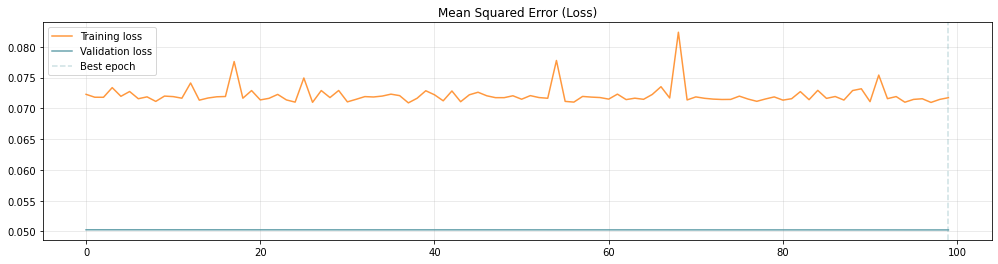

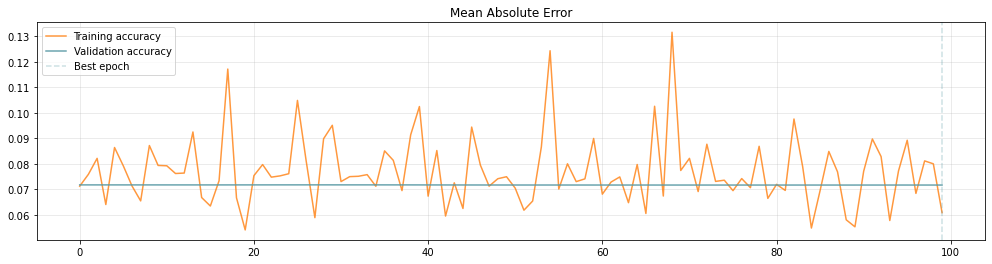

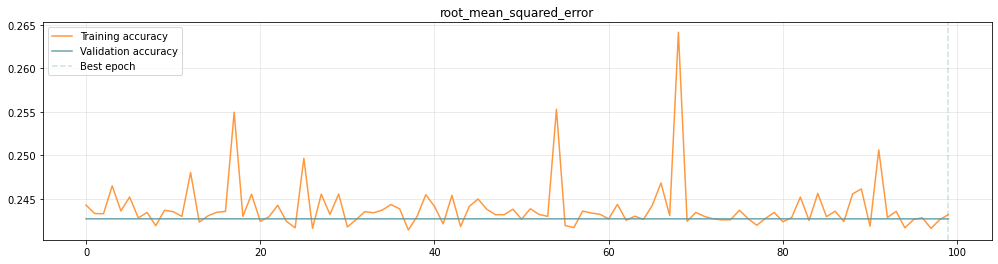

In [28]:
# Plot the training
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['mae'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_mae'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['root_mean_squared_error'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_root_mean_squared_error'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('root_mean_squared_error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [29]:
y_pred1= model.predict([x2, a2],batch_size=n2)
print('y_pred1',y_pred1)
#print('y_pred1[15]',y_pred1[15])

1/1 [==============================] - 0s 19ms/step
y_pred1 [[-0.00272818 -0.01265571  0.0647326  -0.01909238  0.00400411  0.0049609
  -0.00906873 -0.03900898  0.0341967  -0.03388106 -0.006564   -0.05586918
  -0.04785958 -0.01379474 -0.05370217  0.14571828]
 [-0.00282527 -0.01310608  0.06703622 -0.01977181  0.0041466   0.00513745
  -0.00939145 -0.04039718  0.03541364 -0.03508678 -0.00679759 -0.05785738
  -0.04956273 -0.01428565 -0.05561325  0.15090391]
 [-0.00282334 -0.01309713  0.06699043 -0.01975831  0.00414377  0.00513394
  -0.00938504 -0.04036959  0.03538945 -0.03506281 -0.00679295 -0.05781786
  -0.04952888 -0.01427589 -0.05557526  0.15080082]
 [-0.00282237 -0.01309263  0.06696744 -0.01975153  0.00414234  0.00513218
  -0.00938182 -0.04035573  0.03537731 -0.03505078 -0.00679062 -0.05779802
  -0.04951188 -0.01427099 -0.05555619  0.15074909]
 [-0.00282127 -0.01308754  0.06694137 -0.01974384  0.00414073  0.00513018
  -0.00937816 -0.04034002  0.03536353 -0.03503713 -0.00678797 -0.057775

In [30]:
y=targets
df=pd.DataFrame(y,columns=['y_true'])
pred=np.array(y_pred1[15])
df['y_pred']=pred
print(df)

NameError: name 'targets' is not defined

In [ ]:
#print(y_pred[15],y)
y1=targets1
df1=pd.DataFrame(y1,columns=['y_true'])
pred1=np.array(y_pred1[15])
df1['y_pred']=pred1
print(df1)

          y_true    y_pred
0   9.467379e+07  0.101800
1   3.839332e+08  0.000265
2   2.699809e+08  0.000083
3   8.157967e+07  0.022130
4   5.449503e+08  0.000037
5   1.274099e+09  0.000151
6   2.058071e+09  0.001526
7   2.101724e+08  0.052930
8   1.436575e+09  0.000022
9   2.493902e+09  0.408812
10  1.325679e+09  0.000682
11  1.739703e+09  0.000120
12  1.541005e+09  0.390255
13  4.256834e+09  0.006363
14  1.792077e+09  0.002751
15  3.944498e+09  0.012073


In [ ]:
model_metrics = model.evaluate([x1,a1],labels_encoded1, return_dict=True)
print("Test metrics handmade model",model_metrics)

1/1 [==============================] - 0s 21ms/step - loss: 0.0982 - mae: 0.1120 - root_mean_squared_error: 0.3133
Test metrics handmade model {'loss': 0.09820312261581421, 'mae': 0.11197242885828018, 'root_mean_squared_error': 0.3132556676864624}


In [ ]:
y_pred[15]

array([0.02142636, 0.01534876, 0.01142783, 0.02541816, 0.02090915,
       0.02594018, 0.02259602, 0.02497141, 0.018046  , 0.01770126,
       0.01409446, 0.01248658, 0.01608839, 0.00888556, 0.00992036,
       0.01512774], dtype=float32)